# Next 3 minutes (approx.) of your presentation -- Core Analysis
If you used ML (regression, classification, or something else); mention mainly WHICH one(s).
You may now briefly CLARIFY why and how the ML problem(s) aim(s) to solve your objective.
How did you apply ML technique(s) to SOLVE your problem? Which model(s), how and why?
Did you only use tools and techniques learned in this course? What ELSE did you learn / try?

#### Import libriaries and framework

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Prepare the data

In [27]:
# Load the data from the CSV file into a DataFrame
data = pd.read_csv('datasets/listings_preprocessed.csv')

# Separate the input features (X) and target variable (y)
X = data.drop('price', axis=1)
y = data['price']

# Filter out non-numeric columns
numeric_columns = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# One-hot encode categorical features
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align the columns of the training and testing sets
X_train, X_test = X_train.align(X_test, join='left', axis=1)

# Fill missing values in the training set with the mean of each column
X_train.fillna(X_train.mean(), inplace=True)

# Fill missing values in the test set with the mean of the corresponding columns in the training set
X_test.fillna(X_train.mean(), inplace=True)

# Fill remaining NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

#### Filter and extract only top 20 variables to be used to predict the price

In [28]:
# Calculate the correlation matrix between features and the target variable
corr_matrix = X_train.corrwith(y_train)

# Select the top 20 variables with the highest positive correlation values
top_20_correlated = corr_matrix[corr_matrix > 0].sort_values(ascending=False)[:20]

# Print the top 20 variables
print("Top 20 positively correlated variables:\n", top_20_correlated)

# Filter the original training and testing sets to include only the top 20 correlated variables
X_train_selected = X_train[top_20_correlated.index]
X_test_selected = X_test[top_20_correlated.index]

Top 20 positively correlated variables:
 bedrooms                                       0.425693
calculated_host_listings_count_entire_homes    0.410485
host_listings_count                            0.347692
calculated_host_listings_count                 0.323658
host_total_listings_count                      0.316270
host_id                                        0.305003
property_type_Entire rental unit               0.288468
accommodates                                   0.284359
property_type_Entire serviced apartment        0.282429
name_score                                     0.280922
id                                             0.278065
amenities_count                                0.257157
description_score                              0.240169
availability_30                                0.228111
property_type_Entire condo                     0.208351
availability_60                                0.191297
neighbourhood_cleansed_Southern Islands        0.179568
availab

#### Predict the data

In [29]:
# Create a linear regression model
model = LinearRegression()

# Train the model using the training data with the selected features
model.fit(X_train_selected, y_train)

# Predict the prices for the test set
y_pred = model.predict(X_test_selected)

#### Display the coefficients and performance metrics

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error and R^2 score for the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the coefficients of the linear regression model
coefficients = model.coef_
print("Linear regression model coefficients")
for feature, coef in zip(top_20_correlated.index, coefficients):
    print(f"{feature}: {coef}")

# Print the results
print("")
print("Performance metrics")
print("Mean squared error:", mse)
print("R^2 score:", r2)


Linear regression model coefficients
bedrooms: 6.587520242395851e-05
calculated_host_listings_count_entire_homes: 0.03147763103028148
host_listings_count: 0.0693653727300326
calculated_host_listings_count: 0.03231701606353553
host_total_listings_count: 0.11855619662115177
host_id: 2.3733758278226401e-07
property_type_Entire rental unit: 2.950338505904377e-05
accommodates: 2.8970141727199945e-05
property_type_Entire serviced apartment: 2.4038728748645683e-06
name_score: 3.0737905531203644e-05
id: 5.186479943164742e-17
amenities_count: 0.001986711754696658
description_score: 3.418529944459919e-05
availability_30: 0.0006095982429649812
property_type_Entire condo: 9.215703980927754e-05
availability_60: 0.0009814350788047025
neighbourhood_cleansed_Southern Islands: -2.8298036903302772e-06
availability_90: 0.0011089572733009299
neighbourhood_cleansed_Orchard: 6.798342754135842e-06
neighbourhood_cleansed_Clementi: 9.237952788045685e-06

Performance metrics
Mean squared error: 12663.9766895129

#### Plot the regression model

#### Linear regression model for each variable predicting the price individually

###### loop through the top 20 positively correlated features

In [36]:
# Initialize lists to store R^2 scores and coefficients
r2_scores = []
coefficients = []

# Loop through the top 20 positively correlated features
for feature in top_20_correlated.index:
    # Create a linear regression model
    model = LinearRegression()

    # Train the model using the individual feature from the training data
    model.fit(X_train_selected[[feature]], y_train)

    # Predict the prices for the test set
    y_pred = model.predict(X_test_selected[[feature]])

    # Calculate the R^2 score for the predictions
    r2 = r2_score(y_test, y_pred)

    # Append the R^2 score and coefficient to the respective lists
    r2_scores.append(r2)
    coefficients.append(model.coef_[0])

# Print the R^2 scores and coefficients for each feature
for feature, r2, coef in zip(top_20_correlated.index, r2_scores, coefficients):
    print(f"{feature}: R^2 = {r2:.4f}, Coefficient = {coef:.4f}")


bedrooms: R^2 = 0.2281, Coefficient = 90.1501
calculated_host_listings_count_entire_homes: R^2 = 0.1909, Coefficient = 0.7649
host_listings_count: R^2 = 0.1260, Coefficient = 0.3034
calculated_host_listings_count: R^2 = 0.1144, Coefficient = 0.5965
host_total_listings_count: R^2 = 0.1106, Coefficient = 0.1629
host_id: R^2 = 0.0792, Coefficient = 0.0000
property_type_Entire rental unit: R^2 = 0.0829, Coefficient = 98.1885
accommodates: R^2 = 0.1139, Coefficient = 15.3518
property_type_Entire serviced apartment: R^2 = 0.0962, Coefficient = 112.1512
name_score: R^2 = 0.0560, Coefficient = 79.1715
id: R^2 = 0.0534, Coefficient = 0.0000
amenities_count: R^2 = 0.0580, Coefficient = 2.9887
description_score: R^2 = 0.0704, Coefficient = 67.9846
availability_30: R^2 = 0.0489, Coefficient = 2.0544
property_type_Entire condo: R^2 = 0.0407, Coefficient = 71.0061
availability_60: R^2 = 0.0331, Coefficient = 0.9263
neighbourhood_cleansed_Southern Islands: R^2 = 0.0085, Coefficient = 216.5579
availab

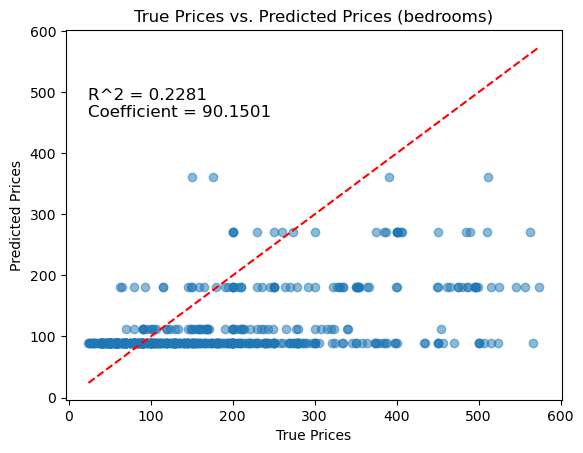

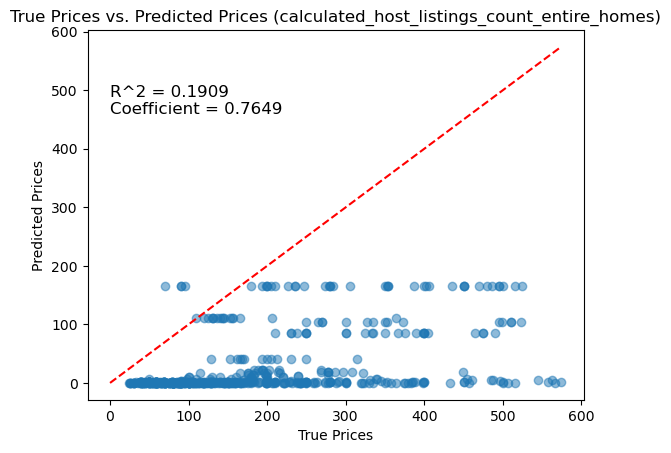

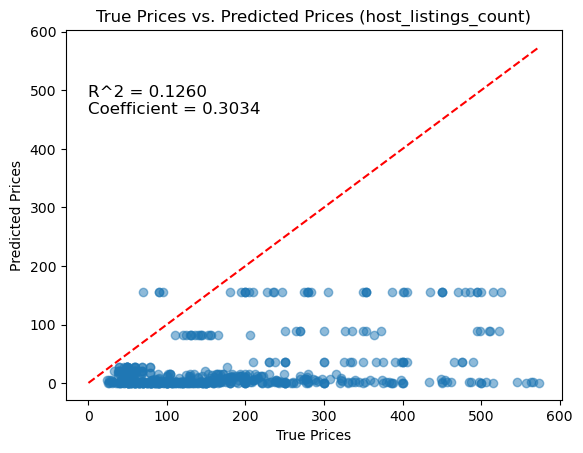

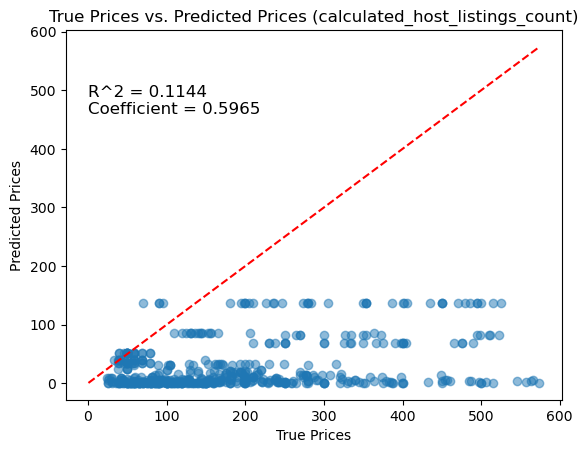

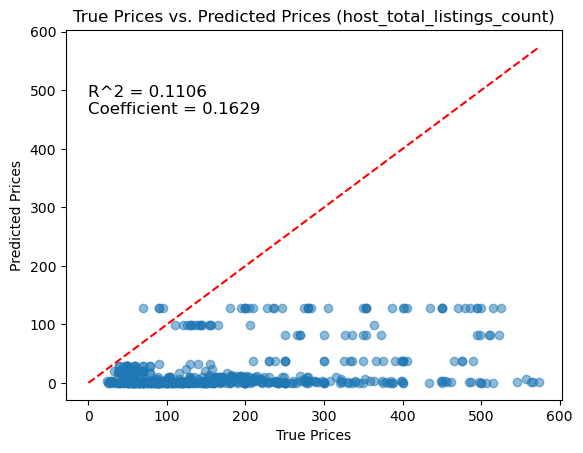

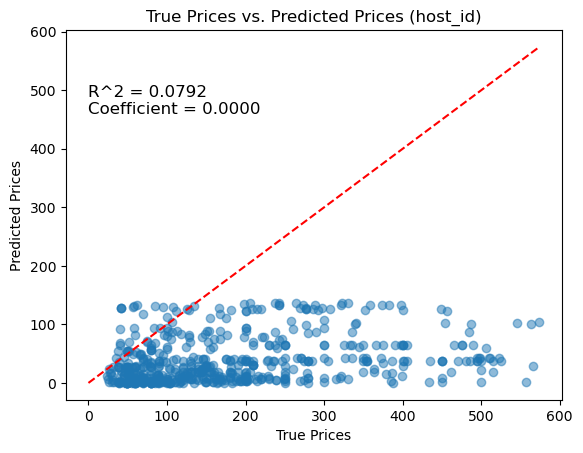

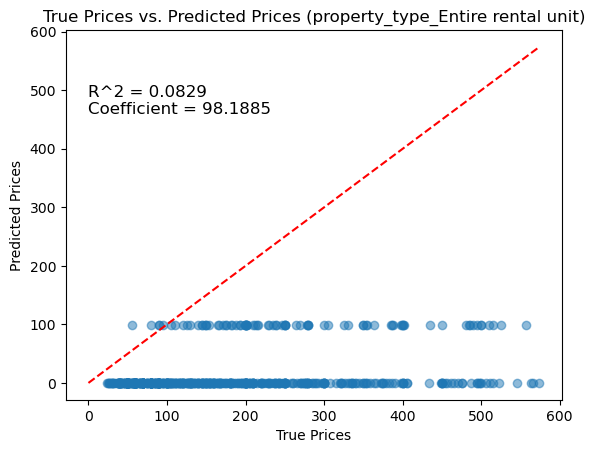

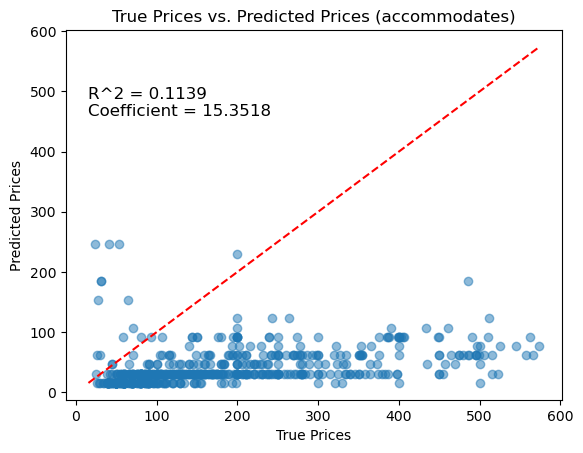

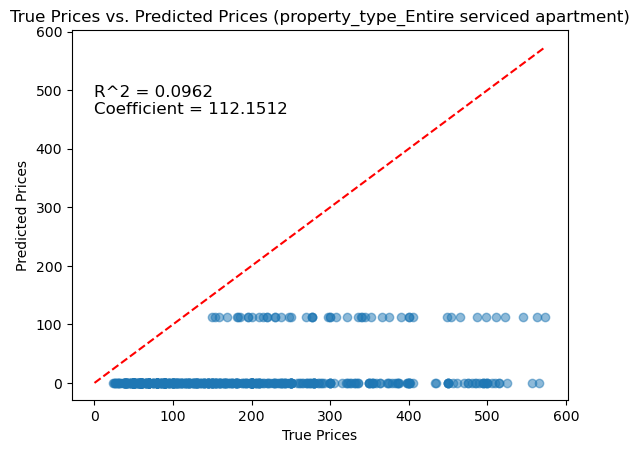

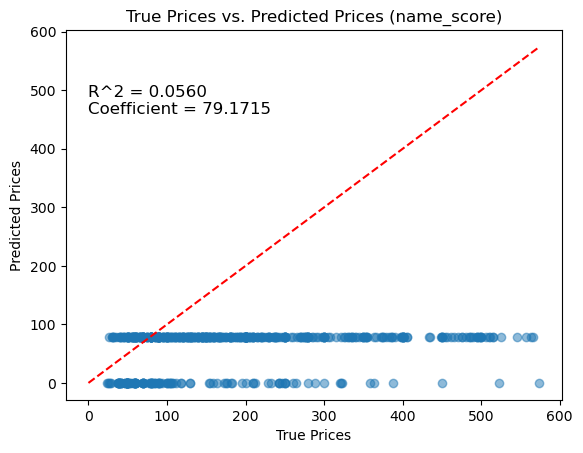

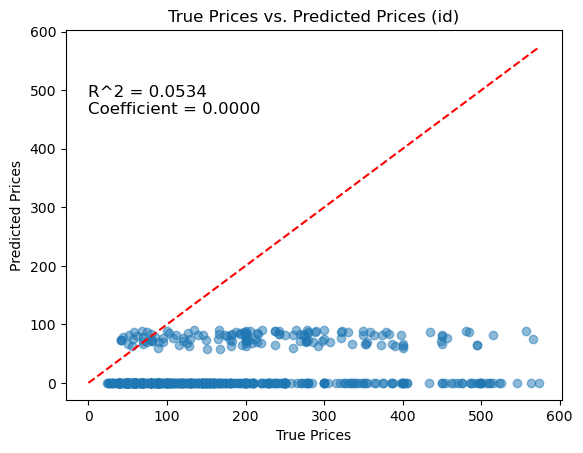

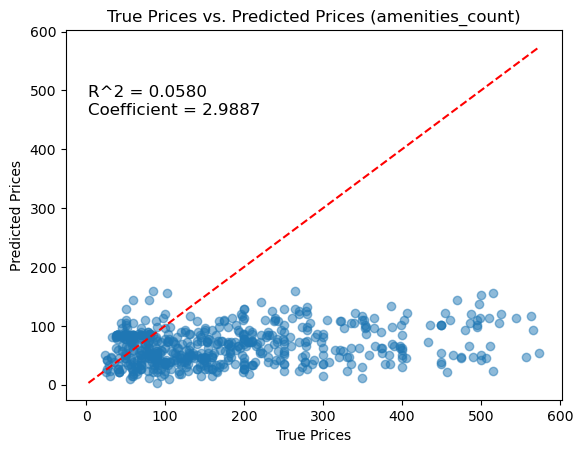

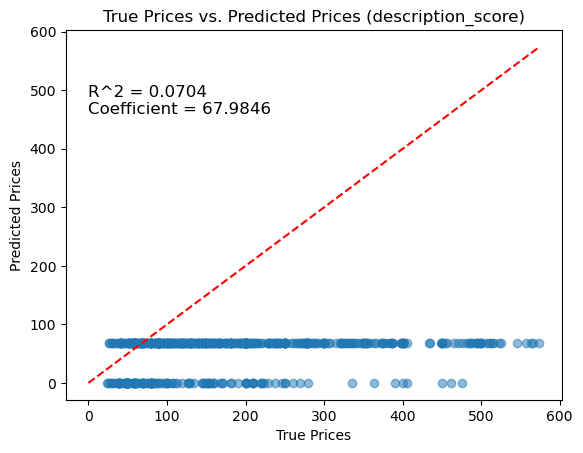

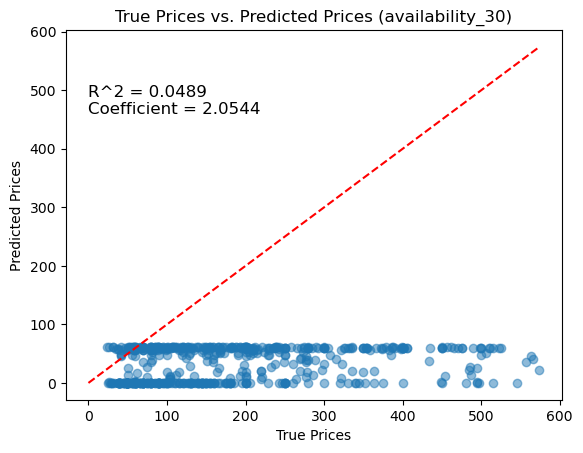

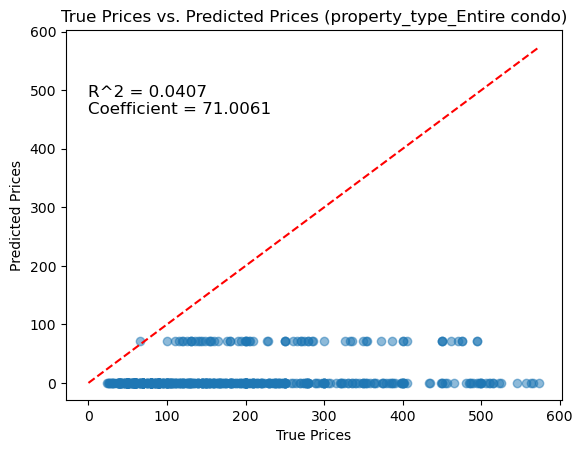

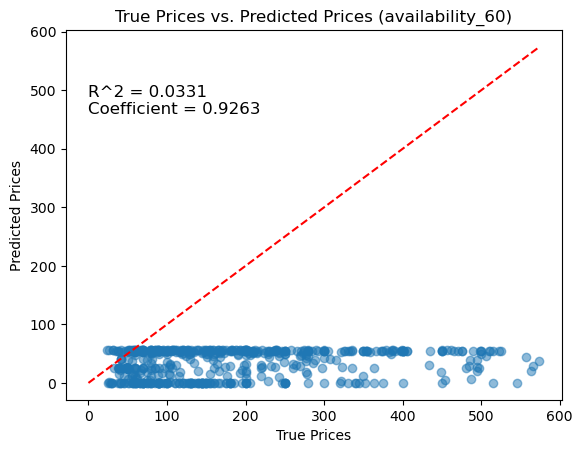

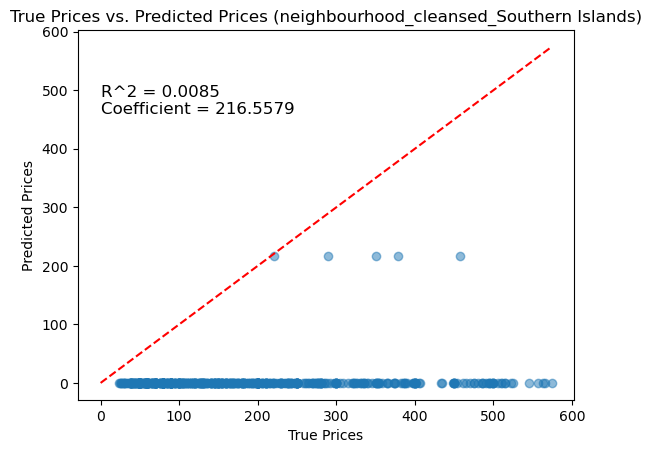

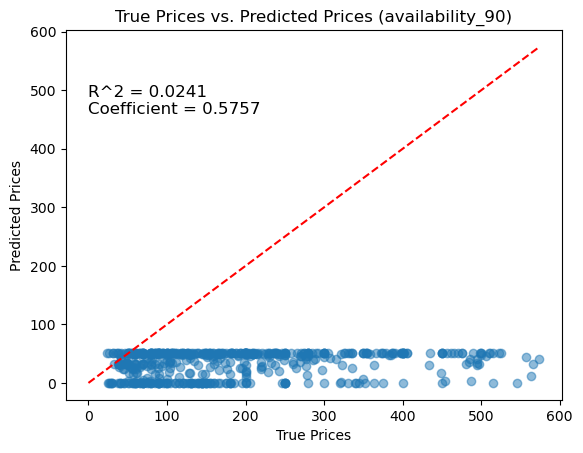

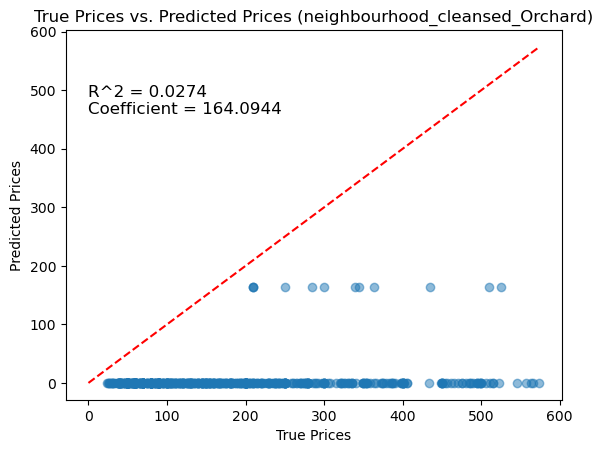

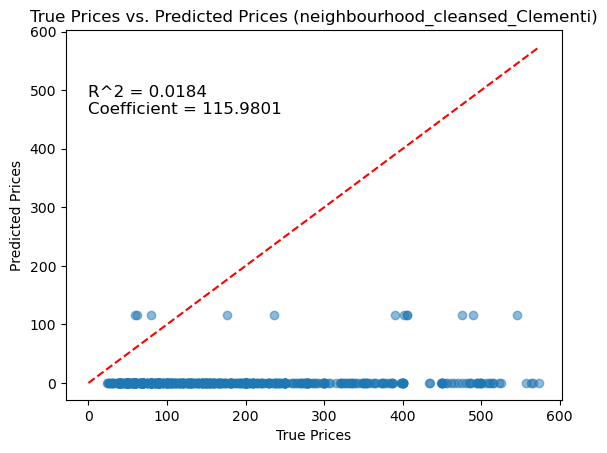

In [39]:
# Function to create a scatter plot for each feature
def plot_regression(feature, y_test, y_pred, r2, coef):
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('True Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'True Prices vs. Predicted Prices ({feature})')

    min_val = min(y_test.min(), y_pred.min()[0])
    max_val = max(y_test.max(), y_pred.max()[0])
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

    plt.text(min_val, max_val * 0.8, f'R^2 = {r2:.4f}\nCoefficient = {coef:.4f}', fontsize=12)
    plt.show()

# Loop through the top 20 positively correlated features and create a plot for each
for feature, r2, coef in zip(top_20_correlated.index, r2_scores, coefficients):
    y_pred = X_test_selected[[feature]] * coef
    plot_regression(feature, y_test, y_pred, r2, coef)

#### Visualize the performance of the regression model

##### Create a scatter plot of the true prices (y_test) against the predicted prices (y_pred)

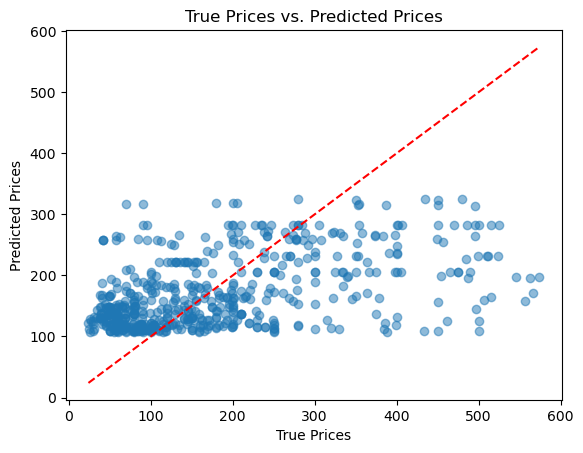

In [35]:
import matplotlib.pyplot as plt

# Create a scatter plot of the true prices against the predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True Prices vs. Predicted Prices')

# Add a diagonal line to represent perfect predictions
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

# Show the plot
plt.show()


##### General comment

##### It seems to be that using linear regression to predict the data is more straightforward by looking at the model. We are able to deduce that most of the variables are indeed not able to predict the price since its correlation value is less than 0.5